# **Ex3**

## Names and IDs

1.   Ofir Tamir
2.   Chen Frydman


## 1. Fuel efficiency price prediction (35 points)
In this section we will use regression tree model for predicting the fuel efficiency for different cars


The features data available here:
https://raw.githubusercontent.com/EyalHadad/Files/main/data.csv

The labels are here:
https://raw.githubusercontent.com/EyalHadad/Files/main/labels.csv


In [ ]:
import numpy as np
# load the data
import pandas as pd
y = pd.read_csv(r'https://raw.githubusercontent.com/EyalHadad/Files/main/labels.csv')
X = pd.read_csv(r'https://raw.githubusercontent.com/EyalHadad/Files/main/data.csv')


### EDA visuallization (5pts)

Explore the data. What features are meaningful? what are the correlated features? display statistcs about the data itself including it's value ranges.

In [ ]:
# EDA
# Display basic information about the data
print("Shape of y (labels):", y.shape)
print("Shape of X (features):", X.shape)

# Display the first few rows of the data to understand its structure
print("\nHead of y (labels):")
print(y.head())
print("\nHead of X (features):")
print(X.head())

# Display summary statistics for numerical features
print("\nSummary statistics of X (features):")
print(X.describe())

# Check for missing values
print("\nMissing values in y:")
print(y.isnull().sum())
print("\nMissing values in X:")
print(X.isnull().sum())

# Check for correlated features
print("\nCorrelation matrix of X (features):")
print(X.corr())

Shape of y (labels): (398, 1)
Shape of X (features): (398, 7)

Head of y (labels):
    MPG
0  18.0
1  15.0
2  18.0
3  16.0
4  17.0

Head of X (features):
   Cylinders  Displacement  Horsepower  Weight  Acceleration  Model Year  \
0        8.0         307.0       130.0     NaN          12.0        70.0   
1        8.0         350.0       165.0  3693.0          11.5        70.0   
2        NaN         318.0       150.0  3436.0          11.0         NaN   
3        8.0         304.0         NaN     NaN           NaN        70.0   
4        8.0         302.0         NaN  3449.0          10.5        70.0   

  Origin  
0    USA  
1    USA  
2    NaN  
3    NaN  
4    USA  

Summary statistics of X (features):
        Cylinders  Displacement  Horsepower       Weight  Acceleration  \
count  307.000000    288.000000  284.000000   293.000000    305.000000   
mean     5.527687    199.633681  105.109155  2975.184300     15.618689   
std      1.702089    103.550163   38.472863   842.988873      2.

<ipython-input-26-ac6b416ed26d>:24: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(X.corr())


### EDA insights (5pts)

What are you insgits based on the previuse visualization?

<Figure size 1200x800 with 0 Axes>

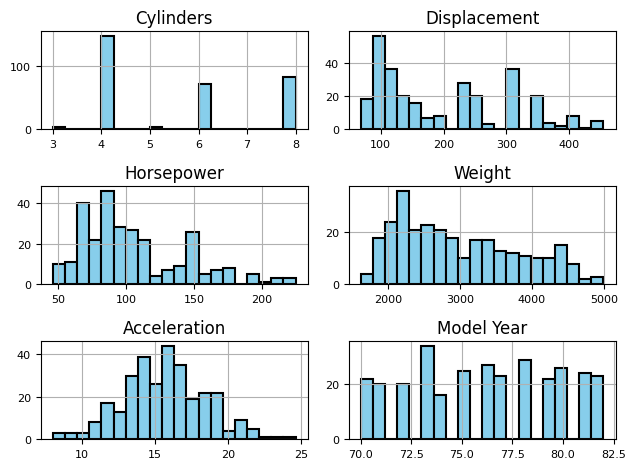

<ipython-input-27-44b439052cad>:13: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)


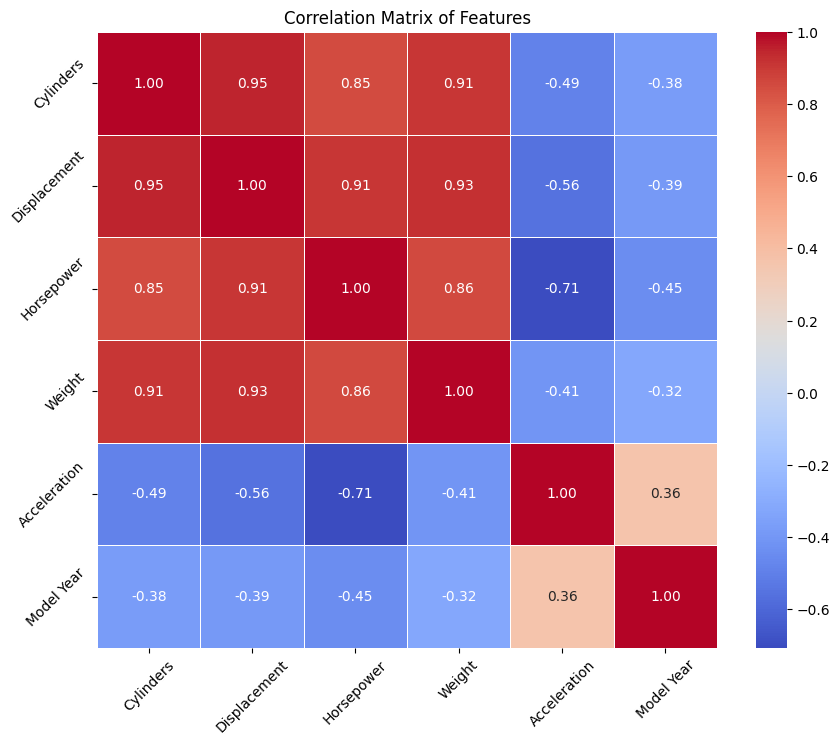

In [ ]:
# Graph 2 -
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical features in X
plt.figure(figsize=(12, 8))
X.hist(bins=20, color='skyblue', edgecolor='black', linewidth=1.5, xlabelsize=8, ylabelsize=8)
plt.tight_layout()
plt.show()

# Correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()


### Preprocessing (5pts)

Apply preprocessing according to your data, handle missing values and split the dataset into train-test as well.
Explain the reason for all methods that you apply.

Make sure that it doesn't affect the data charateristics. Which means that the correlations stay the same (if it was not corelated before it shouldn't be now).

In [ ]:
# Preprocessing -
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Define numerical and categorical columns
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

# Preprocessing pipeline for numerical features
numerical_transformer = SimpleImputer(strategy='mean')

# Preprocessing pipeline for categorical features
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Bundle preprocessing for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Preprocess the data
X_processed = preprocessor.fit_transform(X)

encoded_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(input_features=categorical_cols)
feature_names = list(numerical_cols) + list(encoded_feature_names)

# Split the dataset into train and test sets
# we split the data by 80-20 because 20% is reasonable amount of data to put for testing
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Display the shapes of train and test sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (318, 10)
Shape of X_test: (80, 10)
Shape of y_train: (318, 1)
Shape of y_test: (80, 1)


### Model training and evaluation (10 pts)


Split the data into train-test with 80-20% ratio.
Train the regression tree model on the training set and check it's performance on the test set using two evaluation metrics.
Compare the results and write your conclusion

In [ ]:
from sklearn.tree import DecisionTreeRegressor
# Model training
# Train the regression tree model
regression_tree = DecisionTreeRegressor(random_state=42)
regression_tree.fit(X_train, y_train)

# Predict on the test set
y_pred = regression_tree.predict(X_test)

In [ ]:
# Evaluation
from sklearn.metrics import mean_absolute_error, r2_score

# Evaluate performance using Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Evaluate performance using R-squared (R2 score)
r2 = r2_score(y_test, y_pred)

# Print evaluation results
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2 score):", r2)

Mean Absolute Error (MAE): 2.9375
R-squared (R2 score): 0.6676644621860452


### Explainability (10 pts)

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 5.0 MB/s eta 0:00:00


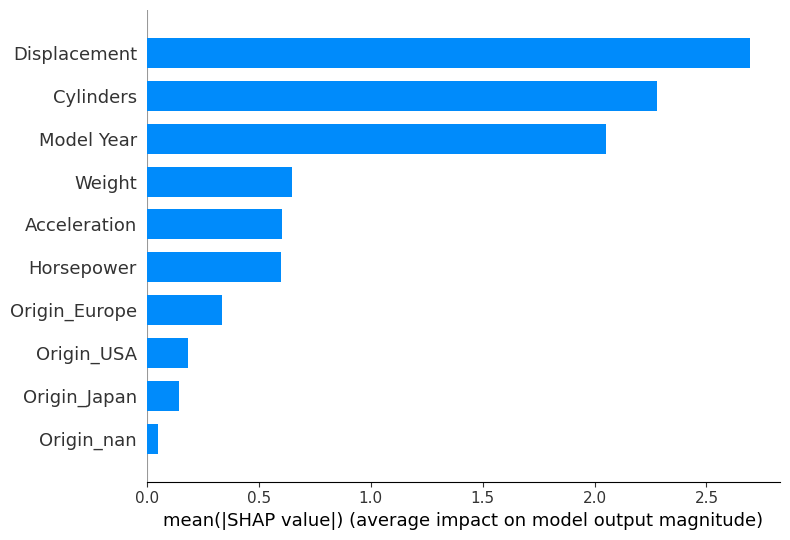

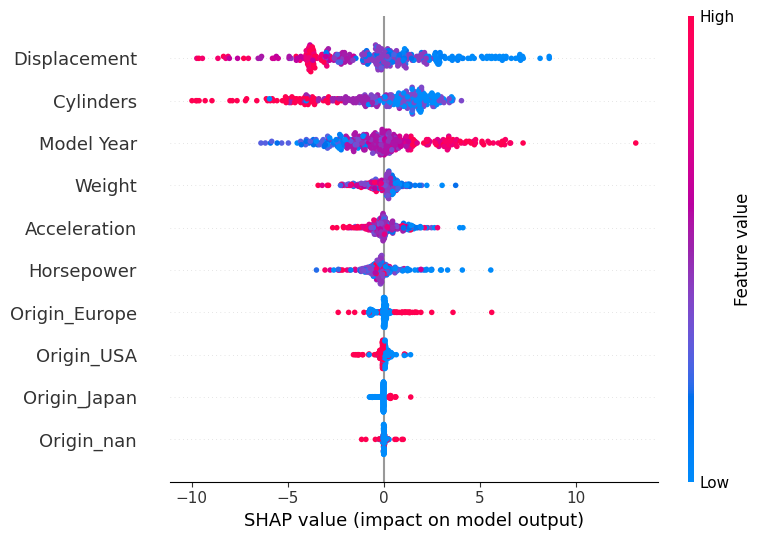

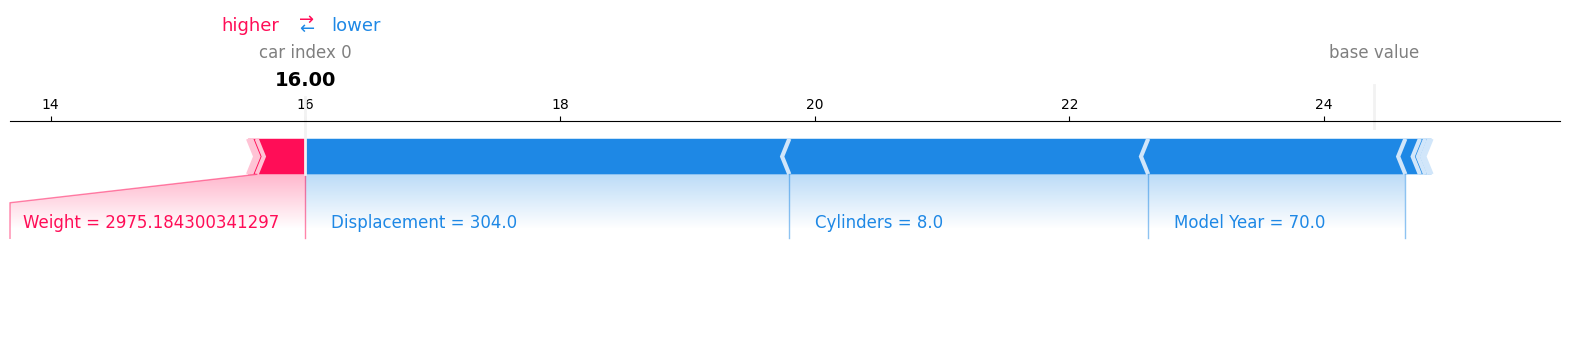

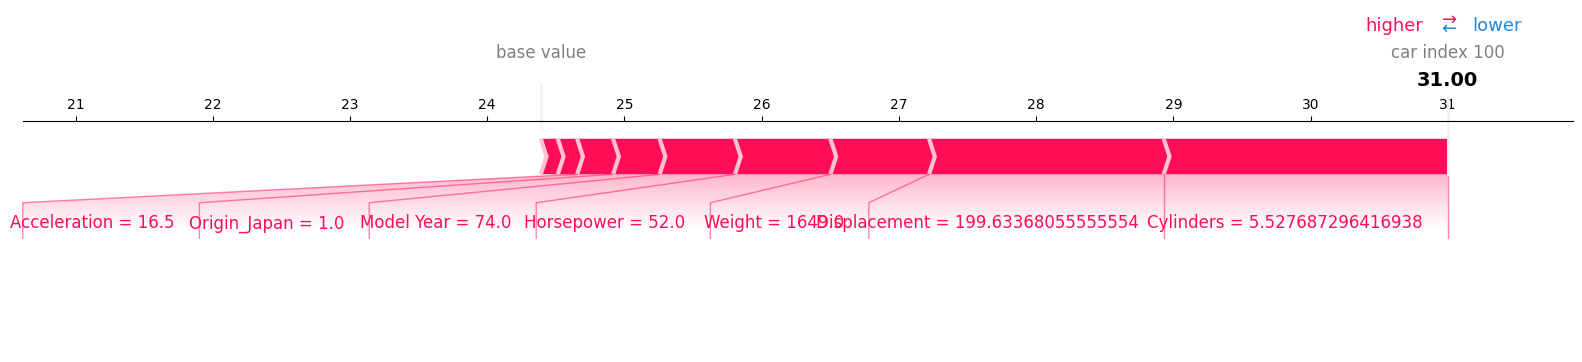

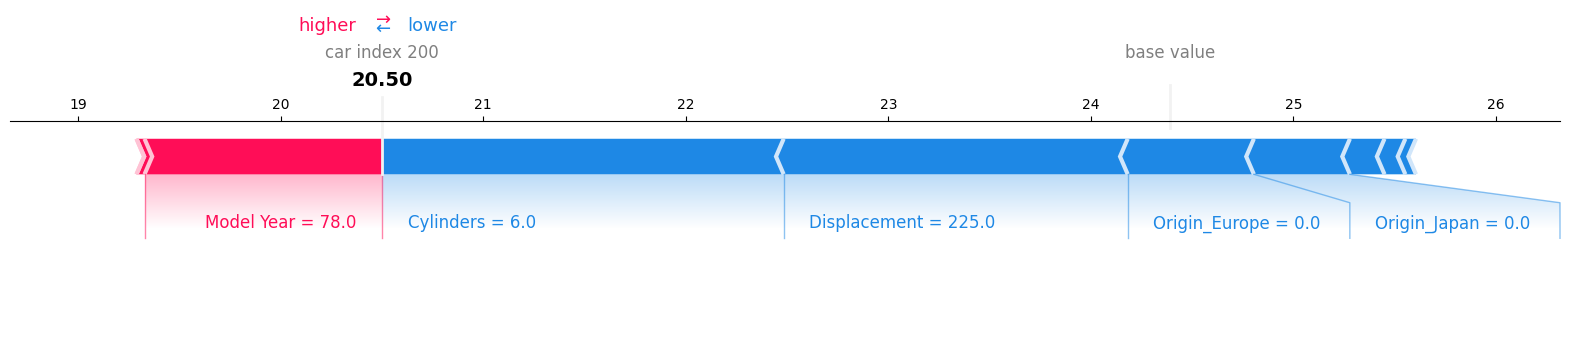

In [ ]:
import shap

# Create a SHAP explainer object
explainer = shap.Explainer(regression_tree, X_train)

# Calculate SHAP values for the training set
shap_values = explainer.shap_values(X_train)

# Plot the SHAP summary plot
shap.summary_plot(shap_values, X_train, plot_type='bar', feature_names=feature_names)

#Shap beeswarm
shap.summary_plot(shap_values, X_train, plot_type='dot', feature_names=feature_names)

# Choose three different cars for explanation
car_indices = [0, 100, 200]  # Indices of three different cars in the training set

# Explain specific predictions for the chosen cars
shap.initjs()
for idx in car_indices:
    # Get the SHAP values for the specific car
    shap.force_plot(explainer.expected_value, shap_values[idx], X_train[idx], matplotlib=True, feature_names=feature_names, out_names=f"car index {idx}")

## 2. Classification evaluation (15 points)

Submit question 2 as a PDF file with the calculations, graphs and explainations.

### ROC and precision recall curve (8 pts)

> Indented block



Calculate ROC curve and precision recall curve with the follwing tresholds: [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
The probabilities are:

| label | classifier 1 | classifier 2|
|--------|----------|---------------|
|1|0.41|1.00|
|0	|0.00	|0.72
|0	|0.00	|0.99
|1	|0.73	|0.14
|0	|0.62	|0.00
|1	|1.00	|0.94
|0	|1.00	|0.10
|1	|0.14	|0.77
|0	|0.00	|0.02
|1	|0.55	|1.00






Answer the following questions:
1. Which model is better based on those graphs?
2. If those models predict heart attack, choose a 'one threshold' metric (such as acc, precision, etc..) and explain why it's a suitable metric for this case.

Please look at the pdf attached to the homework


### Curves differences (7 pts)

Create a new table with two columns: 'label' and 'predictions'. Fill the table with 10 rows of values representing binary labels and corresponding predicted probabilities.
Ensure that the values chosen for the predictions are deliberately selected to make the ROC curve and precision-recall curve look different - which means that according to one curve the model is good, and according to the second one it's bad.
After filling the table, draw both the ROC curve and precision-recall curve using the provided data.
Explain the values that you chose and the reason for the change.

## 3. Ensembel (40 pts)

### implement adaBoost (25 pts)
implement the adaboost algorithm from scratch, refer to the lecture slides for the algorithm 43.
you may add any helper functions if needed but make sure to add documentation if you do so.
note, the base_estimator in sklearn supports sample_weight, you may use it if you want to.

In [ ]:
import numpy as np
from copy import deepcopy

class AdaBoost:
    def __init__(self, n_estimators,base_estimator):
        self.n_estimators = n_estimators
        self.base_estimator = base_estimator
        self.estimators = []  # to store weak learners
        self.alphas = []      # to store the weight of each weak learner

    def fit(self, X, y):
        # Initialize weights
        m = X.shape[0]
        D = np.ones(m) / m  # initialize weights

        for _ in range(self.n_estimators):
            # Train weak learner with current weights
            # print(D[:5])
            estimator = deepcopy(self.base_estimator)
            estimator.fit(X, y, sample_weight=D)

            # Predictions and errors
            y_pred = estimator.predict(X)
            weighted_error = np.sum(D * (y_pred != y))
            # Avoid division by zero
            if weighted_error == 0:
                weighted_error = 1e-10

            # Compute confidence
            alpha = 0.5 * np.log((1 / weighted_error) - 1)

            # Update sample weights
            D *= np.exp(-alpha * y * y_pred)
            D /= np.sum(D)
            # Save estimator and alpha
            self.estimators.append(estimator)
            self.alphas.append(alpha)

    def predict(self, X):
            predictions = np.zeros(X.shape[0])
            # Make predictions with each estimator
            for estimator, alpha in zip(self.estimators, self.alphas):
                predictions += alpha * estimator.predict(X)
            return np.sign(predictions)

### Model training
train the adaboost model using the synthetic data below, use the following base estimators n_estimators=3,5,10:
1. DecisionTreeClassifier with max_depth=1
2. DecisionTreeClassifier with max_depth=3
3. svm.SVC with kernel='linear'


In [ ]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
y = np.where(y == 0, -1, y)

# Define base classifiers
dt1 = DecisionTreeClassifier(max_depth=1)
dt3 = DecisionTreeClassifier(max_depth=3)
svm_linear = svm.SVC(kernel='linear')

# Define AdaBoost classifiers with different base estimators
adaboost_dt1_3 = AdaBoost(n_estimators=3, base_estimator=dt1)
adaboost_dt3_3 = AdaBoost(n_estimators=3, base_estimator=dt3)
adaboost_svm_3 = AdaBoost(n_estimators=3, base_estimator=svm_linear)

adaboost_dt1_5 = AdaBoost(n_estimators=5, base_estimator=dt1)
adaboost_dt3_5 = AdaBoost(n_estimators=5, base_estimator=dt3)
adaboost_svm_5 = AdaBoost(n_estimators=5, base_estimator=svm_linear)

adaboost_dt1_10 = AdaBoost(n_estimators=10, base_estimator=dt1)
adaboost_dt3_10 = AdaBoost(n_estimators=10, base_estimator=dt3)
adaboost_svm_10 = AdaBoost(n_estimators=10, base_estimator=svm_linear)

# Fit the models
adaboost_dt1_3.fit(X,y)
adaboost_dt3_3.fit(X,y)
adaboost_svm_3.fit(X,y)
adaboost_dt1_5.fit(X,y)
adaboost_dt3_5.fit(X,y)
adaboost_svm_5.fit(X,y)

adaboost_dt1_10.fit(X,y)
adaboost_dt3_10.fit(X,y)
adaboost_svm_10.fit(X,y)

### Model comparison (5 pts)
compare the models using the following metrics:
1. accuracy
2. precision

In [ ]:
from sklearn.metrics import accuracy_score, precision_score

def calculate_metrics(model, X, y):
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred)
    return accuracy, precision

# Calculate metrics for each model
metrics = {}

#X_test,y_test = X,y
# Models with n_estimators=3
metrics['dt1_3'] = calculate_metrics(adaboost_dt1_3, X, y)
metrics['dt3_3'] = calculate_metrics(adaboost_dt3_3, X, y)
metrics['svm_3'] = calculate_metrics(adaboost_svm_3, X, y)

# Models with n_estimators=5
metrics['dt1_5'] = calculate_metrics(adaboost_dt1_5, X, y)
metrics['dt3_5'] = calculate_metrics(adaboost_dt3_5, X, y)
metrics['svm_5'] = calculate_metrics(adaboost_svm_5, X, y)

# Models with n_estimators=10
metrics['dt1_10'] = calculate_metrics(adaboost_dt1_10, X, y)
metrics['dt3_10'] = calculate_metrics(adaboost_dt3_10, X, y)
metrics['svm_10'] = calculate_metrics(adaboost_svm_10, X, y)

# Print the metrics
print("Metrics:")
for model, (accuracy, precision) in metrics.items():
    print(f"Model: {model}, Accuracy: {accuracy}, Precision: {precision}")

Metrics:
Model: dt1_3, Accuracy: 0.726, Precision: 0.8169014084507042
Model: dt3_3, Accuracy: 0.857, Precision: 0.8016949152542373
Model: svm_3, Accuracy: 0.872, Precision: 0.8519924098671727
Model: dt1_5, Accuracy: 0.795, Precision: 0.8266666666666667
Model: dt3_5, Accuracy: 0.916, Precision: 0.8835489833641405
Model: svm_5, Accuracy: 0.87, Precision: 0.8514285714285714
Model: dt1_10, Accuracy: 0.827, Precision: 0.8029739776951673
Model: dt3_10, Accuracy: 0.962, Precision: 0.9772256728778468
Model: svm_10, Accuracy: 0.87, Precision: 0.8514285714285714


### compare number of learners (10 pts)
Choose the best base estimator from the previous section.
Compare the effect of the number of learners on the models error on both the training set and validation set.
use n_estimators = [1,5,10,20,50,100] and plot the error rate for each number of learners.
discuss the results.

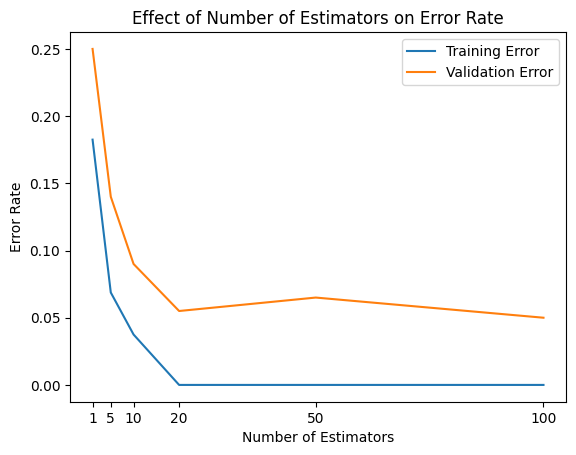

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import zero_one_loss

# choose the best performing base leaner based on last cell
base_learner = dt3

# Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define list of n_estimators to try
n_estimators_list = [1, 5, 10, 20, 50, 100]

# Train AdaBoost models with different number of estimators
train_errors = []
val_errors = []

for n_amount_estimators in n_estimators_list:
    # Train AdaBoost model with SVM base estimator
    ada_model = AdaBoost(n_estimators=n_amount_estimators, base_estimator=base_learner)
    ada_model.fit(X_train, y_train)

    # Compute errors
    train_error = zero_one_loss(y_train, ada_model.predict(X_train))
    val_error = zero_one_loss(y_val, ada_model.predict(X_val))

    # Append errors to lists
    train_errors.append(train_error)
    val_errors.append(val_error)

# Plot error rates
plt.plot(n_estimators_list, train_errors, label='Training Error')
plt.plot(n_estimators_list, val_errors, label='Validation Error')
plt.xlabel('Number of Estimators')
plt.ylabel('Error Rate')
plt.title('Effect of Number of Estimators on Error Rate')
plt.xticks(n_estimators_list)
plt.legend()
plt.show()


## 4. SVM (10 points)

Submit question 4 in the pdf file.

### Find the SVM formula (6 pts)

Given the following points find and draw the SVM formula (hyperplane formula):

| x1 | x2 | class|
|--------|----------|---------------|
|1|6|-|
|1	|10	|-
|4	|11	|-
|6	|1	|+
|7	|6	|+
|10	|4	|+

### Margin size (4 pts)

Based on the hyperplane, calculate the margin size.